In [112]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [113]:
# print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
# print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

yes_no = {"Yes": True, "No": False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [114]:
from numpy import nan

episodes = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    nan: False
}

for i in range(3, 9):
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].map(episodes)
    
star_wars[star_wars.columns[3:9]].loc[:5]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [115]:
for i in range(3, 9):
    after = 'seen_'+str(i-2)
    star_wars.rename(columns={star_wars.columns[i]:after}, inplace=True)

star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [116]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

for i in range(9, 15):
    after = 'ranking_'+str(i-8)
    star_wars.rename(columns={star_wars.columns[i]:after}, inplace=True)

star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


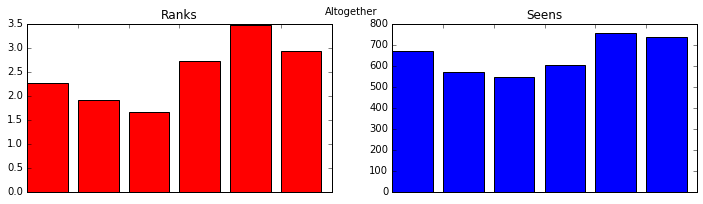

In [145]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def generate_plot(fig, df):
    rank_cols = df.columns[9:15]
    ranks = 6 - df[rank_cols].mean()
    
    ax = fig.add_subplot(1, 2, 1)
    ax.bar(np.arange(6), ranks, color='r')
    ax.set_xticklabels([], rotation=90)
    ax.set_title("Ranks")

    seen_cols = df.columns[3:9]
    seens = df[seen_cols].sum()
    
    ax = fig.add_subplot(1, 2, 2)
    ax.bar(np.arange(6), seens, color='b')
    ax.set_xticklabels([], rotation=90)
    ax.set_title("Seens")


fig = plt.figure(figsize=(12, 3))
generate_plot(fig, star_wars)
plt.suptitle("Altogether")
plt.show()

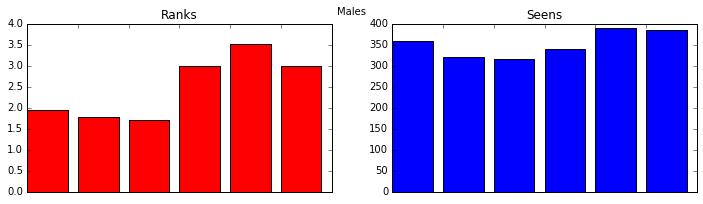

In [146]:
males = star_wars[star_wars["Gender"] == "Male"]

fig = plt.figure(figsize=(12, 3))
generate_plot(fig, males)
plt.suptitle("Males")
plt.show()

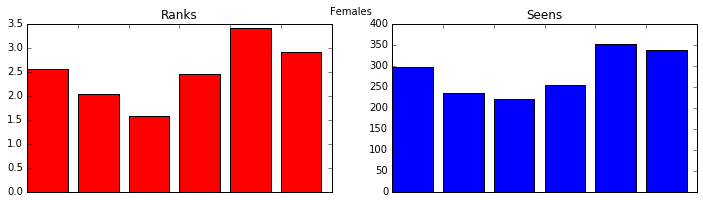

In [147]:
females = star_wars[star_wars["Gender"] == "Female"]

fig = plt.figure(figsize=(12, 3))
generate_plot(fig, females)
plt.suptitle("Females")
plt.show()

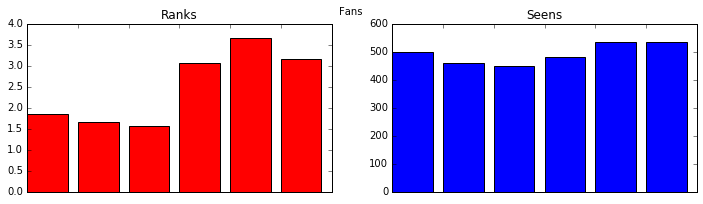

In [152]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==True]

fig = plt.figure(figsize=(12, 3))
generate_plot(fig, fans)
plt.suptitle("Fans")
plt.show()

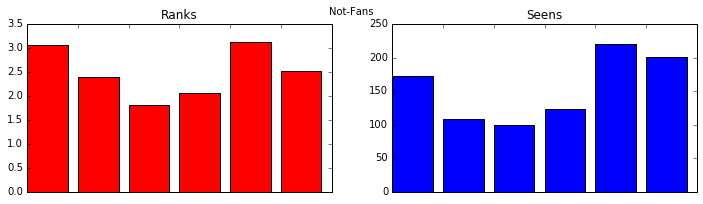

In [153]:
nfans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==False]

fig = plt.figure(figsize=(12, 3))
generate_plot(fig, nfans)
plt.suptitle("Not-Fans")
plt.show()

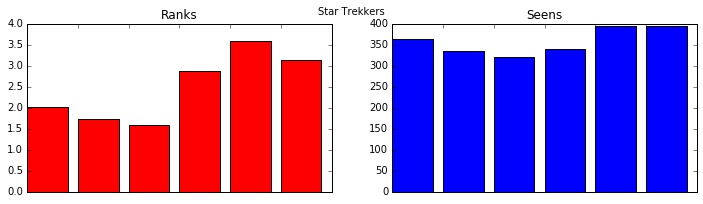

In [154]:
streks = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=='Yes']

fig = plt.figure(figsize=(12, 3))
generate_plot(fig, streks)
plt.suptitle("Star Trekkers")
plt.show()

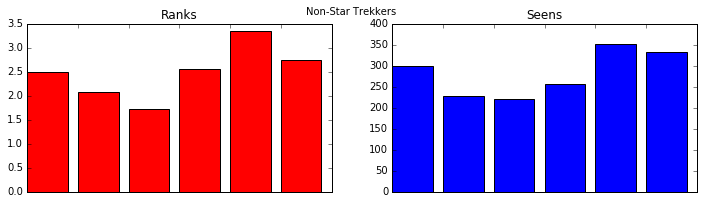

In [155]:
nstreks = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=='No']

fig = plt.figure(figsize=(12, 3))
generate_plot(fig, nstreks)
plt.suptitle("Non-Star Trekkers")
plt.show()

next steps:

Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
Which character do respondents like the most?
Which character do respondents dislike the most?
Which character is the most controversial (split between likes and dislikes)?